In [1]:
# Common Imports
import numpy as np                                                                                                                                                                 
import matplotlib.pyplot as plt

# Data processing
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler

# Personal Machine Learning Model
from lib.knn import KNeighborsClassifier

# Personal library for data manipulation
from lib.utils import create_dataset, load_data, split_train_test, get_error_rate

## Get the data

**This is a home-made function to load the data from the text file, a better version than that in the book; although in the real world, it is recommended to use pandas.read_csv or numpy.load_txt functions.**

In [2]:
X, y = load_data('datingTestSet.txt') 

**Check the shape to make sure the parsed data is good.**

In [3]:
X.shape, y.shape

((1000, 3), (1000,))

**As seen from the text file, the label datatype is string. It is recommended to convert it to nominal numbers**

In [4]:
y.dtype

dtype('<U10')

In [5]:
y[:10]

array(['largeDoses', 'smallDoses', 'didntLike', 'didntLike', 'didntLike',
       'didntLike', 'largeDoses', 'largeDoses', 'didntLike', 'largeDoses'],
      dtype='<U10')

**The conversion can easily be done by scikit-learn LabelEncoder transformer.**

In [6]:
encoder = LabelEncoder()
y = encoder.fit_transform(y) 
y[:10]

array([1, 2, 0, 0, 0, 0, 1, 1, 0, 1])

**Create new training and test data sets.**

In [7]:
X_train, y_train, X_test, y_test = split_train_test(X, y, ratio=0.2)

## visualize the data to gain insights

**First col vs. Third col**

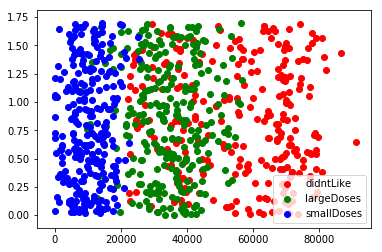

In [8]:
unique = list(set(y))
colors = ['red', 'green', 'blue']

fig, ax = plt.subplots()
for i in unique:
    x1 = X_train[y_train[:]==i, 0]
    x2 = X_train[y_train[:]==i, 2]
    ax.scatter(x1, x2, c=colors[i],
                label=encoder.inverse_transform(np.array([i]))[0])
    ax.legend()

**Second col vs. third col**

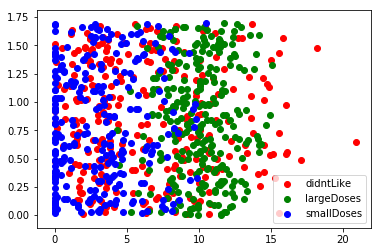

In [9]:
fig, ax = plt.subplots()
for i in unique:
    x1 = X_train[y_train[:]==i, 1]
    x2 = X_train[y_train[:]==i, 2]
    ax.scatter(x1, x2, c=colors[i],
                label=encoder.inverse_transform(np.array([i]))[0])
    ax.legend()

**Frequent Flier Miles vs. Time Spent on Video Game**

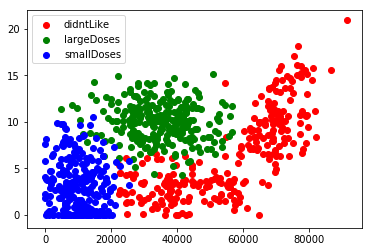

In [10]:
fig, ax = plt.subplots()
for i in unique:
    x1 = X_train[y_train[:]==i, 0]
    x2 = X_train[y_train[:]==i, 1]
    ax.scatter(x1, x2, c=colors[i],
                label=encoder.inverse_transform(np.array([i]))[0])
    ax.legend()

## Prepare the data for machine learning algorithms 

**Feature Scaling--StandardScalar transformer**

In [11]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)

## Predict results with KNN algorithm

**"Train" the model (actually KNN is instance-based, and does not need to be trained)**

In [12]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

In [13]:
y_predict = neigh.predict(scale.transform(X_test))

In [15]:
error_rate = get_error_rate(y_test, y_predict)
print("The error rate of this KNN model is {}".format(error_rate))

The error rate of this KNN model is 0.03
